In [1]:
# -*- coding: utf-8 -*-
import os as os
import pandas as pd
import numpy as np
import pickle
import pyodbc
import glob
import csv
import random
# import preprocessing
import time
from sklearn.ensemble import RandomForestClassifier
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier #整合(可分配占比)
# from sklearn import cross_validation #交叉驗證資料準確度(這個以廢棄)
# from sklearn.cross_validation import cross_val_score #交叉驗證資料準確度(這個以廢棄)
from sklearn.model_selection import cross_val_score #交叉驗證資料準確度
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

print("【訊息】目前的工作目錄:",os.getcwd())

【訊息】目前的工作目錄: D:\Mypython


In [2]:
trainlabel = []
row = [1,0,0,1,1,0,1,1,"Class_7"]
table = {"Class_1":1,"Class_2":2,"Class_3":3,"Class_4":4,"Class_5":5,"Class_6":6,"Class_7":7,"Class_8":8,"Class_9":9}
trainlabel.append(table.get(row[-1]))
print(row[-1])
print(table.get(row[-1]))

Class_7
7


In [24]:
import random
number_list = [7, 14, 21, 28, 35, 42, 49, 56, 63, 70]
print ("Original list : ",  number_list)

random.seed(102)
random.shuffle(number_list) #洗牌
print ("List after first shuffle  : ",  number_list)
random.shuffle(number_list)
print ("List after second shuffle : ",  number_list)

Original list :  [7, 14, 21, 28, 35, 42, 49, 56, 63, 70]
List after first shuffle  :  [7, 56, 28, 14, 49, 63, 35, 70, 42, 21]
List after second shuffle :  [70, 14, 28, 56, 42, 49, 63, 7, 35, 21]


In [4]:
import random
string_list = ["Paint It Black", "Gimme Shelter", "Sympathy for the Devil", "Satisfaction", "You Cant Always Get What You Want"]
print ("Original String list: ",  string_list)

random.shuffle(string_list) #洗牌
print ("String List after the first shuffle  : ",  string_list)

random.shuffle(string_list)
print ("String List after the second shuffle : ",  string_list)

Original String list:  ['Paint It Black', 'Gimme Shelter', 'Sympathy for the Devil', 'Satisfaction', 'You Cant Always Get What You Want']
String List after the first shuffle  :  ['Satisfaction', 'Sympathy for the Devil', 'Gimme Shelter', 'You Cant Always Get What You Want', 'Paint It Black']
String List after the second shuffle :  ['Sympathy for the Devil', 'You Cant Always Get What You Want', 'Gimme Shelter', 'Satisfaction', 'Paint It Black']


In [5]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
randomIndex = [i for i in range(10)]
print(randomIndex)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
 test123 = pd.read_csv(r'D:\Mypython\train.csv',sep=',',header=0,engine='python')

In [8]:
print(test123[1:5]['feat_1'])

1    0
2    0
3    1
4    0
Name: feat_1, dtype: int64


In [24]:
X = datafile.columns
for i in X :
    print(i)

feat_1
feat_2
feat_3
feat_4
feat_5
feat_6
feat_7
feat_8
feat_9
feat_10
feat_11
feat_12
feat_13
feat_14
feat_15
feat_16
feat_17
feat_18
feat_19
feat_20
feat_21
feat_22
feat_23
feat_24
feat_25
feat_26
feat_27
feat_28
feat_29
feat_30
feat_31
feat_32
feat_33
feat_34
feat_35
feat_36
feat_37
feat_38
feat_39
feat_40
feat_41
feat_42
feat_43
feat_44
feat_45
feat_46
feat_47
feat_48
feat_49
feat_50
feat_51
feat_52
feat_53
feat_54
feat_55
feat_56
feat_57
feat_58
feat_59
feat_60
feat_61
feat_62
feat_63
feat_64
feat_65
feat_66
feat_67
feat_68
feat_69
feat_70
feat_71
feat_72
feat_73
feat_74
feat_75
feat_76
feat_77
feat_78
feat_79
feat_80
feat_81
feat_82
feat_83
feat_84
feat_85
feat_86
feat_87
feat_88
feat_89
feat_90
feat_91
feat_92
feat_93
target


In [73]:
x = [1,2,3,4,5,6,7,8]
random.shuffle(x)
print(list(x))

[7, 6, 4, 1, 5, 3, 8, 2]


In [58]:
cc = []
cc.append(df['target'])
print(cc[0][60000])

9


In [5]:
print(list(datafile['target']))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [87]:
aa = []
x = [[11,22,33],[14,25,36],[74,85,96]]
b = x
aa.append(b[0:2][0:1])
print(aa)
print(len(aa))

[[[11, 22, 33]]]
1


In [20]:
print(datafile.loc[1])
print(datafile.loc[1,datafile.columns[0:93]] )

feat_1     1
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    1
feat_12    0
feat_13    0
feat_14    0
feat_15    0
feat_16    0
feat_17    2
feat_18    0
feat_19    0
feat_20    0
feat_21    0
feat_22    1
feat_23    0
feat_24    4
feat_25    1
feat_26    1
feat_27    0
feat_28    0
feat_29    2
feat_30    0
          ..
feat_65    1
feat_66    0
feat_67    7
feat_68    0
feat_69    0
feat_70    0
feat_71    1
feat_72    0
feat_73    0
feat_74    0
feat_75    0
feat_76    0
feat_77    0
feat_78    0
feat_79    2
feat_80    1
feat_81    0
feat_82    0
feat_83    0
feat_84    0
feat_85    1
feat_86    0
feat_87    0
feat_88    0
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     1
Name: 1, Length: 94, dtype: int64
feat_1     1
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    1
feat_12    0
feat_13    0
feat

In [2]:
traindata = []
trainlabel = []
datafile=pd.read_csv(r'D:\Mypython\train.csv', sep=',', index_col=0, header=0)
print(list(datafile.columns))    #觀看輸入資料的欄位
datafile['target'] = datafile['target'].str[-1].astype(int)  #將 class1 , class2...class9 轉換成 1 , 2...9
for i in range(1,len(datafile)):   #6萬筆資料的輸入
    l = []
    l = datafile.loc[i,datafile.columns[0:93]] 
    traindata.append(l)     #每筆放入 feat_1 , feat_2 ..... feat_93
    trainlabel.append(datafile.loc[i,datafile.columns[-1]])  #把每筆的 target 放入
traindata = np.array(traindata,dtype="float") #轉化成陣列  
trainlabel = np.array(trainlabel,dtype="int") #轉化成陣列
# trainlabel = np.array(trainlabel,dtype="str") #轉化成陣列，但轉字串
mean = traindata.mean(axis=0)   #平均
# axis = 0：壓縮行，對各列求均值，返回 1 * n 矩陣
# axis = 1 ：壓縮列，對各行求均值，返回 m * 1 矩陣
std = traindata.std(axis=0)     #標準差
traindata = (traindata - mean)/std #正規化

['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84', 'feat_85', 'feat_86', 'feat_87', 'feat_88', 'feat_89', 'feat_90', 'feat_91', 'feat_9

In [3]:
print("平均 =",mean)
print()
print("標準差 =",std)

平均 = [0.38668649 0.26307028 0.90148197 0.77909401 0.07104417 0.02569614
 0.19370687 0.66244323 1.01131277 0.26391066 1.2528888  0.14087625
 0.48093799 1.69672091 1.28440293 1.41346542 0.36609726 0.57541574
 0.55170742 0.47153223 0.20401765 0.72993196 0.14252469 2.6438903
 1.53452818 0.56311715 0.69662395 0.23897409 0.27562745 0.15031433
 0.14868206 1.04381273 0.69652698 0.94642597 0.66627341 0.70906799
 0.26363592 0.58213876 0.48559238 1.65308596 0.30342454 0.6980138
 0.45115309 0.56083844 0.23813372 0.64138533 0.24967274 1.58490231
 0.34832005 0.32428851 0.05329929 0.21348805 0.44203824 2.07241786
 0.32310875 0.30378008 0.30909708 0.69798148 0.38860966 1.02989802
 0.23974983 1.18751717 0.16859253 1.25681594 0.2222312  0.57171485
 2.89753867 0.39287619 0.81114146 0.89280346 0.31929473 0.85873588
 0.59105968 0.57981156 0.72681287 0.74846874 0.12419801 0.36642048
 0.30045089 0.69807845 0.07846211 0.18798584 0.49671122 0.07075327
 0.53231411 1.12859382 0.39355496 0.8749293  0.45777914 0.8

In [3]:
randomIndex = [i for i in range(len(trainlabel))]  # 多少筆資料
random.shuffle(randomIndex)   #亂數洗牌 ， 以免每筆資料有連貫
traindata = traindata[randomIndex]
trainlabel = trainlabel[randomIndex]

In [4]:
def evaluation(label,pred_label):
    num = len(label)
    logloss = 0.0
    for i in range(num):
        p = max(min(pred_label[i][label[i]-1],1-10**(-15)),10**(-15))
        logloss += np.log(p)
    logloss = -1*logloss/num
    return logloss

<img src='1556159560469.jpg' width=800 heigh=600 align=left>

In [5]:
data = traindata
label = trainlabel
test_data = data[0:3000]      #測試集
test_label = label[0:3000]    #驗證集
train_data = data[3000:]     #訓練集
train_label = label[3000:]   #訓練集
print("測試集",len(test_data),"筆")
print("驗證集",len(test_label),"筆")
print("訓練集",len(train_data),"筆")
print("訓練集",len(train_label),"筆")

測試集 3000 筆
驗證集 3000 筆
訓練集 58877 筆
訓練集 58877 筆


In [12]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(train_data,train_label)
print(skf) 
for train_index, test_index in skf.split(train_data,train_label):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_data_train, train_data_test = train_data[train_index], train_data[test_index]
    train_label_train, train_label_test = train_label[train_index], train_label[test_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [11321 11323 11326 ... 58874 58875 58876] TEST: [    0     1     2 ... 12317 12318 12323]
TRAIN: [    0     1     2 ... 58874 58875 58876] TEST: [11321 11323 11326 ... 23836 23896 23907]
TRAIN: [    0     1     2 ... 58874 58875 58876] TEST: [23083 23112 23132 ... 35680 35696 35718]
TRAIN: [    0     1     2 ... 58874 58875 58876] TEST: [34785 34805 34806 ... 47535 47540 47541]
TRAIN: [    0     1     2 ... 47535 47540 47541] TEST: [46921 46933 46938 ... 58874 58875 58876]


In [41]:
for i in range(1,16):
    rfClf = RandomForestClassifier(criterion='gini', n_jobs=-1, n_estimators=50*i, max_features=18, min_samples_split=5, max_depth=46, class_weight=None)
    rfClf.fit(train_data,train_label)  #餵進資料進行訓練，並模型建置
    test_pred_label = rfClf.predict_proba(test_data)  #測試
    logloss = evaluation(test_label,test_pred_label)
    print((50*i),"=",logloss)
    time.sleep(100)

50 = 0.5781126856107812
100 = 0.5714317658339486
150 = 0.5596125125488716
200 = 0.549966589203922
250 = 0.5473882978651753
300 = 0.5489636679372027
350 = 0.542322194632898
400 = 0.5433293823237006
450 = 0.548461223535049
500 = 0.5460118848551897
550 = 0.5464178880892375
600 = 0.5465471606468615
650 = 0.5411183868159196
700 = 0.5411341497124575
750 = 0.5413119359722944


In [7]:
rfClf = RandomForestClassifier(criterion='gini', n_jobs=-1, n_estimators=500, max_features=18, min_samples_split=5, max_depth=46, class_weight=None)
RF=rfClf.fit(train_data,train_label)  #餵進資料進行訓練，並模型建置
test_pred_label = rfClf.predict_proba(test_data)  # 返回预测属于某標籤的概率 
print(rfClf.predict(test_data)) # 返回预测標籤
print(list(test_pred_label[1]))
print(test_label[1])
logloss = evaluation(test_label,test_pred_label)
print(logloss)

scores = cross_val_score(rfClf,train_data,train_label,cv=5,scoring='accuracy') #交叉驗證分5組
print("每組評分:",np.floor(scores*100))
print("模型評分:",int(scores.mean()*100),"% 的準確率")


[6 2 2 ... 7 9 4]
[0.0, 0.7170984126984126, 0.2217269841269841, 0.03445555555555556, 0.0048, 0.0039, 0.0079, 0.006666666666666666, 0.003452380952380952]
2
0.5336402201011592
每組評分: [80. 80. 81. 80. 81.]
模型評分: 81 % 的準確率


In [22]:
rfClf.classes_  #對應 -> 预测属于某標籤的概率顯示的標籤順序

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
print(list(test_pred_label[1]))
print(test_label[1])

[0.016723809523809526, 0.0012, 0.0, 0.0, 0.0, 0.9416047619047618, 0.00847142857142857, 0.0304, 0.0016]
6


In [115]:
# print(np.max(test_pred_label,axis=1))  #每行最大值
# a =np.where(test_pred_label[0]==np.max(test_pred_label[0]))
# print(a)
print(list(test_pred_label.argmax(axis=1)+1)) #每筆最大值位置

[2, 6, 2, 6, 3, 2, 8, 6, 6, 8, 2, 2, 8, 9, 8, 6, 2, 6, 9, 8, 1, 8, 2, 2, 2, 2, 8, 9, 2, 9, 8, 6, 6, 8, 6, 8, 6, 2, 8, 9, 6, 9, 9, 2, 8, 2, 6, 2, 2, 6, 6, 7, 3, 2, 6, 9, 8, 3, 6, 6, 9, 2, 5, 6, 2, 6, 2, 6, 2, 8, 5, 2, 3, 5, 5, 2, 3, 6, 8, 2, 2, 2, 8, 2, 2, 6, 2, 6, 2, 2, 8, 9, 8, 6, 2, 6, 2, 2, 2, 2, 6, 6, 2, 6, 6, 2, 6, 2, 9, 5, 4, 2, 5, 3, 2, 5, 8, 9, 6, 2, 2, 2, 8, 2, 2, 3, 6, 9, 5, 8, 2, 6, 1, 9, 2, 9, 2, 3, 6, 2, 3, 6, 6, 6, 3, 2, 6, 9, 2, 8, 2, 2, 9, 2, 1, 2, 2, 2, 7, 2, 2, 2, 2, 6, 2, 2, 3, 6, 2, 2, 3, 3, 6, 8, 2, 8, 6, 8, 3, 2, 8, 2, 2, 8, 2, 2, 7, 6, 2, 2, 2, 2, 2, 2, 8, 6, 2, 6, 2, 2, 6, 6, 6, 8, 2, 2, 8, 6, 9, 6, 6, 6, 3, 2, 6, 2, 8, 6, 2, 8, 7, 8, 6, 6, 2, 2, 2, 9, 8, 6, 7, 8, 5, 2, 5, 6, 3, 9, 8, 3, 2, 8, 2, 2, 3, 2, 3, 2, 9, 6, 5, 3, 8, 2, 2, 2, 6, 9, 3, 8, 6, 2, 5, 2, 2, 6, 6, 2, 2, 2, 2, 2, 6, 7, 3, 6, 2, 6, 2, 6, 6, 7, 2, 3, 8, 6, 6, 2, 6, 2, 6, 2, 8, 9, 3, 8, 9, 9, 8, 2, 8, 8, 2, 5, 6, 2, 2, 6, 9, 6, 8, 6, 3, 6, 6, 3, 2, 6, 6, 8, 8, 6, 6, 8, 2, 1, 9, 2, 2, 2, 8, 9, 9, 

In [23]:
train_sizes,train_scores,test_scores = learning_curve(rfClf,train_data,train_label,
                                                      train_sizes = np.linspace(0.1,1.0,5),
                                                      cv=10,n_jobs=-1)

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [24]:
print(train_sizes)
print(train_scores)
print(test_scores)

[ 5298 17220 29142 41064 52986]
[[0.99056248 0.99207248 0.99339373 0.99320498 0.99282748 0.99358248
  0.99282748 0.99320498 0.99282748 0.99339373]
 [0.99047619 0.99146341 0.99157956 0.99088269 0.99059233 0.99111498
  0.99065041 0.99059233 0.99065041 0.99117305]
 [0.99004873 0.99001441 0.98949969 0.98967126 0.99004873 0.98973989
  0.98987715 0.98960264 0.99004873 0.98973989]
 [0.98884668 0.9896503  0.98938243 0.98928502 0.98950419 0.9890902
  0.98896844 0.98955289 0.98999123 0.98994253]
 [0.98860076 0.98935568 0.98894047 0.98888386 0.98937455 0.98901597
  0.98867625 0.98922357 0.98899709 0.98928019]]
[[0.76048209 0.75640808 0.76468591 0.75806452 0.77085103 0.76439613
  0.76235774 0.75980975 0.76648538 0.75658678]
 [0.78815142 0.7806824  0.79151104 0.79269949 0.7968405  0.79718023
  0.7968405  0.78732801 0.79129844 0.79058304]
 [0.7988457  0.79714819 0.80424448 0.79983022 0.80941057 0.80533379
  0.80414473 0.79904875 0.80523453 0.79857216]
 [0.80580547 0.80173145 0.81052632 0.80696095 0.

In [25]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

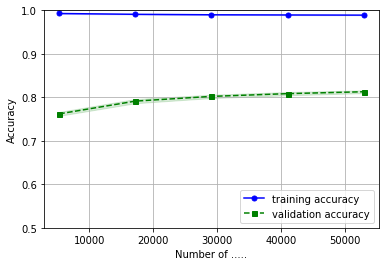

In [26]:
plt.plot(train_sizes,train_mean,color='blue',marker = 'o',markersize = 5 , label = 'training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker = 's',markersize = 5 , label = 'validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of .....')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1.0])
plt.show()

In [117]:
knnClf = KNeighborsClassifier(n_neighbors=128, n_jobs=-1)
knnClf.fit(train_data,train_label)  #餵進資料進行訓練，並模型建置
test_pred_label = knnClf.predict_proba(test_data)  #測試
logloss = evaluation(test_label,test_pred_label)
print(logloss)

scores = cross_val_score(knnClf,train_data,train_label,cv=5,scoring='accuracy') #交叉驗證分5組
print("每組評分:",np.floor(scores*100))
print("模型評分:",int(scores.mean()*100),"% 的準確率")


0.7076235785797556
每組評分: [73. 73. 73. 73. 72.]
模型評分: 73 % 的準確率


In [17]:
KK =[]
for i in range(0,11):
    knnClf = KNeighborsClassifier(n_neighbors=2**i, n_jobs=-1)
    knnClf.fit(train_data,train_label)  #餵進資料進行訓練，並模型建置
    test_pred_label = knnClf.predict_proba(test_data) #測試
    logloss = evaluation(test_label,test_pred_label)
    KK = KK + [logloss]
    print(logloss)

8.164966739756975
5.211440857261441
3.0676464222206024
1.7018930785550765
1.1201616317361538
0.8194164741101374
0.7227082443038568
0.7183127476202773
0.7392230906450789
0.7882084681324298
0.8820503508337737


In [118]:
ABClf = AdaBoostClassifier()
ABClf.fit(train_data,train_label)  #餵進資料進行訓練，並模型建置
test_pred_label = ABClf.predict_proba(test_data)  #測試
logloss = evaluation(test_label,test_pred_label)
print(logloss)

scores = cross_val_score(ABClf,train_data,train_label,cv=5,scoring='accuracy') #交叉驗證分5組
print("每組評分:",np.floor(scores*100))
print("模型評分:",int(scores.mean()*100),"% 的準確率")


2.025912170450068
每組評分: [69. 69. 70. 69. 68.]
模型評分: 69 % 的準確率


In [119]:
LRClf =  LogisticRegression(penalty='l2', solver='lbfgs', n_jobs=-1, C=0.5, class_weight=None, multi_class='multinomial') # multi_class='multinomial' ->  分多類  
LR=LRClf.fit(train_data,train_label)   #餵進資料進行訓練，並模型建置
test_pred_label = LRClf.predict_proba(test_data)  #測試
logloss = evaluation(test_label,test_pred_label)
print(logloss)

scores = cross_val_score(LRClf,train_data,train_label,cv=5,scoring='accuracy') #交叉驗證分5組
print("每組評分:",np.floor(scores*100))
print("模型評分:",int(scores.mean()*100),"% 的準確率")


0.622174522245249
每組評分: [76. 76. 75. 76. 75.]
模型評分: 76 % 的準確率


In [120]:
XGClf =XGBClassifier(base_score=0.5, colsample_bylevel=1,
                             colsample_bytree=0.9, gamma=1,
                             learning_rate=1, max_delta_step=0, max_depth=30,
                             min_child_weight=7, n_estimators=6, nthread=-1,
                             objective='multi:softprob', reg_alpha=0, reg_lambda=1,
                             scale_pos_weight=1, subsample=1)

XG = XGClf.fit(train_data,train_label)  #餵進資料進行訓練，並模型建置
test_pred_label = XGClf.predict_proba(test_data)  #測試
logloss = evaluation(test_label,test_pred_label)
print(logloss)

scores = cross_val_score(XGClf,train_data,train_label,cv=5,scoring='accuracy') #交叉驗證分5組
print("每組評分:",np.floor(scores*100))
print("模型評分:",int(scores.mean()*100),"% 的準確率")


0.5879800960470748
每組評分: [78. 79. 78. 79. 78.]
模型評分: 78 % 的準確率


In [121]:
# model ensemble (模型整合)
eclf = VotingClassifier(estimators=[('rf', RF), ('lr', LR),('xgb',XG)],voting='soft', weights=[3 , 1 , 2])
eclf.fit(train_data,train_label)
test_pred_label = eclf.predict_proba(test_data)
logloss = evaluation(test_label,test_pred_label)
print(logloss)

0.511506019665249


In [122]:
scores = cross_val_score(eclf,train_data,train_label,cv=5,scoring='accuracy') #交叉驗證分5組
print("每組評分:",np.floor(scores*100))
print("模型評分:",int(scores.mean()*100),"% 的準確率")


每組評分: [81. 81. 80. 81. 80.]
模型評分: 81 % 的準確率
